In [1]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Shakira - Waka Waka (This Time for Africa) (The Official 2010 FIFA World Cup™ Song).csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 23379
                    user_id            username  \
0  UCPvr8vrnVNZL6LGq32cet7Q    @ebonygarris4766   
1  UCWMbBGL_17MnjFdXqXWrI2w  @FunnyVideos-kl2og   
2  UCIoG6zuJUw0T9rjzXH3mb8Q   @ginboy_thang5523   
3  UCqofE5ESAoYZqf3CxTooaAw          @gkkbgamer   
4  UCEuQEZb7hNmrLs3qWlaYFoA       @BTS._.BUTTER   

                                             comment  likes  replies  \
0                                 Who’s here in 2029      0        0   
1                                    Whos here today      2        0   
2  Drop a like if you think  these is the best Wo...      1        0   
3                 Best song ever existed in football      1        0   
4                                  Alguém em 2024???      1        1   

                   date                                              video  \
0  2024-10-20T18:39:05Z  Shakira - Waka Waka (This Time for Africa) (Th...   
1  2024-10-20T18:11:24Z  Shakira - Waka Waka

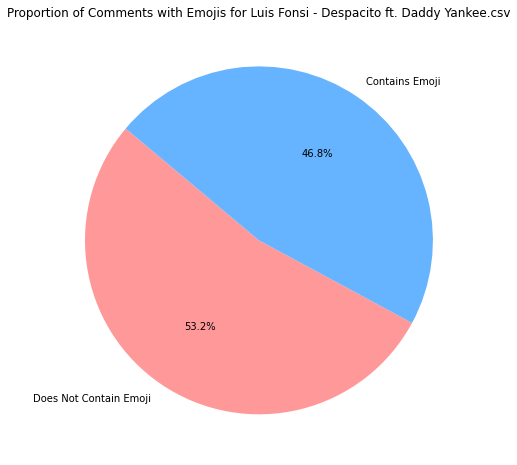

In [2]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [3]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-3-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
2,UCIoG6zuJUw0T9rjzXH3mb8Q,@ginboy_thang5523,Drop a like if you think these is the best Wo...,1,0,2024-10-20T18:03:06Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
5,UCv19JgxXKpQllmHTOOcxhxA,@BibinBabu-sm4zz,Anyone in 2025?🌝,2,0,2024-10-20T17:30:25Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
6,UC6qSUOZnAOK77KlnB1_HURw,@mohammedhafezsoliman,Hellos evrey bady around worled waka wak😂 samn...,0,0,2024-10-20T17:30:22Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,3
7,UC0airPdSqZHIKGnFpvWysMw,@KatusiimeImmaculate-f4l,2024 we go❤❤,0,0,2024-10-20T17:13:35Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
8,UCsDQd5oG7Ic80IjiZP5uQZQ,@CarolineMuthee-k8u,🎉🎉🎉🎉🎉😊,0,0,2024-10-20T17:05:50Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
...,...,...,...,...,...,...,...,...,...
49988,UCeq4kQ1xKBbUCjIekITTA2Q,@renzy8668,2023=>❤,1,0,2023-08-05T13:52:12Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
49992,UC_cC6-N_bx_u09VF4RYB3ew,@nicolaeconstantin998,❤,1,0,2023-08-05T13:13:22Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
49993,UCzpUtKSp8ricrrfGuJwZ01A,@meriemhardoumi1006,☺☺,2,0,2023-08-05T13:12:06Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1
49994,UCBfbO-xiNjXeOBYQwjucwvQ,@abhijithmadhu4050,മലയാളി ❤💥🔥,2,0,2023-08-05T12:56:42Z,Shakira - Waka Waka (This Time for Africa) (Th...,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Shakira - Waka Waka (This Time for Africa) (The Official 2010 FIFA World Cup™ Song).csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 3: Detected language: en
Row 3: Original: Drop a like if you think  these is the best World Cup song ever❤, Translated: Drop a like if you think  these is the best World Cup song ever ❤
Row 3 saved.
Row 6: Detected language: tl
Row 6: Original: Anyone in 2025?🌝, Translated: Anyone in 2025? 🌝
Row 6 saved.
Row 7: Detected language: en
Row 7: Original: Hellos evrey bady around worled waka wak😂 samnamm😂🎉 hamada from Egypt ❤🎉, Translated: Hellos evrey bady around worled waka wak samnamm hamada from Egypt 😂😂🎉❤🎉
Row 7 saved.
Row 8: Detected language: pl
Row 8: Original: 2024 we go❤❤, Translated: 2024 we go ❤❤
Row 8 saved.
Row 9: Text contains only emojis or is empty: 🎉🎉🎉🎉🎉😊
Row 9 saved.
Row 10: Detected language: en
Row 10: Original: 2024 October 😅😅😅, Translated: 2024 October 😅😅😅
Row 10 saved.
Row 11: Detected language: en
Row 11: Original: I was 3 years old when this happened 🙂, Translated: I was 3 years old when this happened 🙂
Row 11 saved.
Row 12: Detected language: en
Row 12: Origina

Row 93: Error translating text: Song💥😌, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 93 saved.
Row 94: Detected language: en
Row 94: Original: This time for 🌍 ❤❤❤, Translated: This time for 🌍❤❤❤
Row 94 saved.
Row 96: Detected language: en
Row 96: Original: The best world cap 2010💔, Translated: The best world cap 2010 💔
Row 96 saved.
Row 98: Detected language: no
Row 98: Error translating text: Fèm rive ak 1k like chak moun kap gadel nan ane 2024 sa please🙏🙏🙏🙏, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 98 saved.
Row 105: Detected language: pt
Row 105: Error translating text: Brasil❤❤❤❤❤❤, Error: Ser

Row 165: Error translating text: N❤❤wyk😊, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 165 saved.
Row 167: Detected language: en
Row 167: Original: I remember when this song was released 2010 when I was pregnant with my first born daughter ❤❤🎉, Translated: I remember when this song was released 2010 when I was pregnant with my first born daughter ❤❤🎉
Row 167 saved.
Row 168: Detected language: en
Row 168: Original: Anyone October 2024 ❤❤🎉, Translated: Anyone October 2024 ❤❤🎉
Row 168 saved.
Row 171: Detected language: cs
Row 171: Error translating text: ❤❤😊😅😂😂😂🎉🎉a svedlove pred oltářem, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the 

Row 238: Error translating text: 73 loves you ❤️ 💖 💓 love ❤️ 😍 💖 ❣️ 💕 💘 ❤️ 😍 💖 ❣️ 💕 💘 ❤️ 😍 💖 ❣️ 💕 💘 ❤️ 😍 💖 ❣️ 💕 💘 ❤️ 😍 💖 ❣️ 💕 💘 ❤️ 😍 💖 ❣️ 💕 💘 ❤️ 😍 💖 ❣️ 💕 💘, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 238 saved.
Row 239: Text contains only emojis or is empty: 😢
Row 239 saved.
Row 240: Detected language: en
Row 240: Original: Most beautiful World Cup song ❤, Translated: Most beautiful World Cup song ❤
Row 240 saved.
Row 241: Text contains only emojis or is empty: ❤❤❤❤❤
Row 241 saved.
Row 243: Detected language: en
Row 243: Original: October 2024...💃💃💃💃💃💃💃💃💃💃💃, Translated: October 2024... 💃💃💃💃💃💃💃💃💃💃💃
Row 243 saved.
Row 244: Error translating text: 2024 🔥👍🏼, Error: No features in text.
Row 244 saved.
Row 247: Error translating text: 2024❤🔥🕺, Error: No features in text.
Row 247 saved.
Row 250: De

Row 317: Error translating text: Anyone 2024
👇, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 317 saved.
Row 318: Detected language: et
Row 318: Error translating text: Nostalgia people's like here(19/10/24)....❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 318 saved.
Row 319: Detected language: en
Row 319: Original: this song belongs to us south Africans😭, Translated: this song belongs to us south Africans 😭
Row 319 saved.
Row 320: Detected language: en
Row 320: Original: Who's here in 2051 with biceps inbuilt speker 🔊, Translated: Who's here in 2051 with biceps inbuilt speker 🔊
Row 320 saved.
Row 3

Row 376: Error translating text: İn amazing music ❤ love you Shakira
👎
👇, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 376 saved.
Row 381: Detected language: pt
